## DeepLesion: automated mining of large-scale lesion annotations and universal lesion detection with deep learning
### Ke Yan$^{a}$, Xiaosong Wang$^{a}$, Le Lu$^{b}$, Ronald M. Summers$^{a}$
#### $^{a}$ National Institutes of Health, Clinical Center, Imaging Biomarkers and Computer-Aided Diagnosis Laboratory, Bethesda, Maryland, United States
#### $^{b}$ National Institutes of Health, Clinical Center, Clinical Image Processing Service, Radiology and Imaging Sciences, Bethesda, Maryland, United States

 Journal of Medical Imaging
 
 Paper 18043R received Mar. 7, 2018; accepted for publication Jun. 14, 2018.
 
---

## DeepLesion Dataset
DeepLesion은 미국 국립 보건원(NIH)의 PACS를 이용하여 RECIST(Response evaluation criteria in solid tumors)를 바탕으로 구축되었으며, 영상의학과 전문의들이 영상 결과를 측정하기 위해 매일 작업하는 동안 표시한 자료이다.

2018년 7월, 미국 국립 보건원(NIH)의 임상센터에서 병변의 탐지 정확도를 높이는 데 도움이 되도록 무료로 이용할수 있도록 공개한 4,400명의 환자들을 통해 만들어진 32,000개의 CT이미지 Data set이다.

- Data : https://nihcc.app.box.com/v/DeepLesion/

## Bookmark
영상의학과 전문의는 영상 이미지를 보고 임상적 주석을 달고 측정한다.

![bookmark](./resource/bookmark.png)

>RECIST-diameter
>- 두개의 선으로 구성
>- 하나는 병변에서 가장 긴 직경을 측정
>- 다른 하나는 측정면에서 가장 긴 직경을 측정
>- 병변의 정확한 위치와 크기를 알수 있음

### Bookmark의 데이터화 
![bookmark](./resource/image/bookmark2csv.png)


### CSV파일 설명

|변수명|설명|값|비고|
|---|---|---|---|
|File_name|파일명|string||
|Patient_index|환자 Index|number||
|Study_index|연구 Index|number||
|Series_ID| Series ID|number||
|Key_slice_index|Slice Index|number||
|Measurement_coordinates| 병변의 RECIST 직경의 영상 좌표|[x11,y11, x12, y12, x21, y21, x22, y22]|<img src="./resource/Measurement_coordinates.png" width="300"/>|
|Bounding_boxes| RECIST 직경에서 추정된 병변의 경계| [x1, y1, x2, y2]|<img src="./resource/Bounding_boxes.png" width="300"/>|
|Lesion_diameters_Pixel_|긴 축과 짧은 축의 길이|[장축 길이, 단축 길이]|<img src="./resource/RECIST.png" width="300"/>|
|Normalized_lesion_location| 중앙의 상대적 신체 위치|[x,y,z]||
|Coarse_lesion_type|병변의 유형|1:뼈(Bone) 2:복부(Abdomen): 간이나 신장에 없는 복강의 병변 3:종격(Mediastinum) : 양쪽 폐 사이의 공간 4:간(Liver) 5:폐(Lung) 6:신장(Kidney) 7:연조직(Soft tiss) : 신체벽, 근육, 피부, 지방, 사지, 머리, 목의 잡다한 병변 8:골반(Pelvis)||
|Possibly_noisy| 수동 확인으로 병변에 노이즈가 있을 경우 1로 설정|0:이상없음 1:노이즈 존재||
|Slice_range|Slice 범위(Key slice와 인접한 slice 이미지 제공 범위)|Bookmark가 표기된 Key slice가 63일때 slice image는 57부터 69까지 제공되었다. [첫 slice index, 마지막 slice index]||
|Spacing_mm_px_| pixel당 mm거리| [x,y,z]||
|Image_size|이미지 크기|[x,y]||
|Patient_gender|환자 성별|M:남자, F:여자||
|Patient_age|환자 나이|number||
|Train_Val_Test|data split|1:train data 2:validation data 3:test data||


### CSV파일 Data Preview

In [3]:
import pandas as pd

csv_path = 'DL_info.csv'
info_df = pd.read_csv(csv_path)

info_df.sample(5)

,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_gender,Patient_age,Train_Val_Test
9709,000900_03_02_499.png,900,3,2,499,"367.401, 275.298, 377.489, 259.07, 377.489, 27...","361.963, 254.07, 382.489, 280.298","19.1075, 12.1861","0.742544, 0.467315, 0.795651",-1,0,"469, 529","0.898438, 0.898438, 1","512, 512","-1500, 500",M,76.0,1
28133,003503_03_01_075.png,3503,3,1,75,"248.963, 148.301, 266.612, 152.876, 254.846, 1...","243.963, 140.686, 271.612, 163.759","18.2322, 13.5053","0.48273, 0.236979, 0.677262",-1,0,"69, 81","0.779297, 0.779297, 5","512, 512","-175, 275",M,53.0,1
30853,003996_01_01_087.png,3996,1,1,87,"159.071, 306.988, 173.507, 323.307, 162.21, 31...","154.071, 301.988, 178.507, 328.307","21.7872, 10.8936","0.274995, 0.558, 0.719856",8,0,"81, 93","0.691406, 0.691406, 5","512, 512","-175, 275",F,25.0,3
1864,000199_01_01_037.png,199,1,1,37,"260.954, 254.496, 234.328, 241.802, 245.164, 2...","229.328, 234.945, 265.954, 259.496","29.4969, 16.9379","0.486292, 0.466682, 0.445799",-1,0,"31, 52","0.9375, 0.9375, 5","512, 512","-175, 275",M,59.0,1
17535,001868_04_01_103.png,1868,4,1,103,"251.455, 267.634, 250.797, 329.462, 227.764, 3...","222.764, 262.634, 287.08, 334.462","61.8309, 54.3187","0.479897, 0.629103, 0.830103",-1,0,"93, 109","0.898438, 0.898438, 5","512, 512","-175, 275",F,43.0,1


(0, 100)

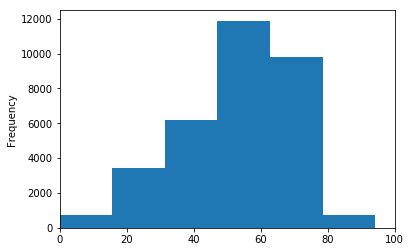

In [39]:
%matplotlib inline
import numpy as np
info_df['Patient_age'].plot(kind='hist')
plt.xlim(0,100)

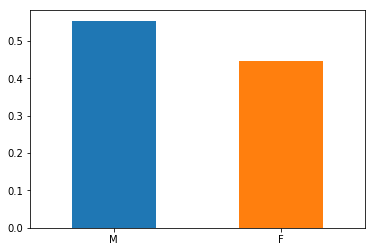

In [31]:
info_df['Patient_gender'] = info_df['Patient_gender'].astype('category')
info_df['Patient_gender'].value_counts(normalize=True).plot(kind='bar', rot=0)

## Image Preprocessing

### CT 이미지 처리 절차
![img_preprocessing](./resource/image/img_preprocessing.png)

## 신경망분석
![froc1](./resource/image/map2.png)

## free receiver operating characteristic curve(FROC)를 통한 모형 예측 평가

![froc1](./resource/image/froc2.png)

## 해당 연구의 한계 및 제안
* 겹쳐진 병변의 분할 
* 3차원 경계상자 미사용
* CT 이미지에는 대표적인 병변만 표시 되었으므로, 일부 CT이미지에는 병변이 있음에도 주석 되지 않음